<a href="https://colab.research.google.com/github/priya265arumugam-code/mini-project/blob/main/Priyadharshini_Student_Performance_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
data = {
    'gender': ['Male','Female','Male','Female','Male','Female','Male','Female'],
    'study_hours': [2,4,3,5,1,6,4,5],
    'attendance': [65,80,70,90,60,95,85,88],
    'parent_education': ['High','Graduate','Graduate','PostGraduate','High','PostGraduate','Graduate','Graduate'],
    'previous_score': [55,70,60,85,50,90,78,82],
    'final_score': [58,75,65,88,52,92,80,85]
}

df = pd.DataFrame(data)
df


,gender,study_hours,attendance,parent_education,previous_score,final_score
0,Male,2,65,High,55,58
1,Female,4,80,Graduate,70,75
2,Male,3,70,Graduate,60,65
3,Female,5,90,PostGraduate,85,88
4,Male,1,60,High,50,52
5,Female,6,95,PostGraduate,90,92
6,Male,4,85,Graduate,78,80
7,Female,5,88,Graduate,82,85


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            8 non-null      object
 1   study_hours       8 non-null      int64 
 2   attendance        8 non-null      int64 
 3   parent_education  8 non-null      object
 4   previous_score    8 non-null      int64 
 5   final_score       8 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 516.0+ bytes


,0
gender,0
study_hours,0
attendance,0
parent_education,0
previous_score,0
final_score,0


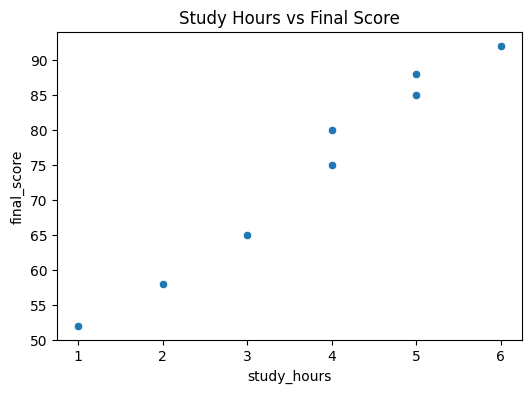

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='study_hours', y='final_score', data=df)
plt.title("Study Hours vs Final Score")
plt.show()


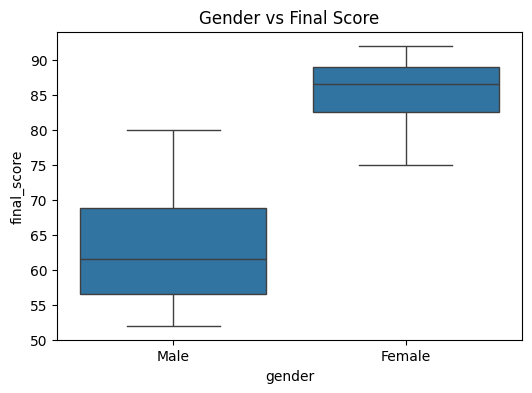

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='final_score', data=df)
plt.title("Gender vs Final Score")
plt.show()


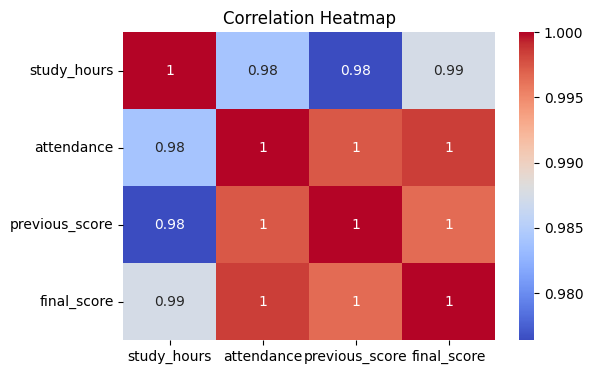

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['parent_education'] = le.fit_transform(df['parent_education'])

X = df.drop('final_score', axis=1)
y = df['final_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression R2: -2.8494809688580864


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest R2: 0.6446249134948097


In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_pred_ann = model.predict(X_test)
print("ANN R2:", r2_score(y_test, y_pred_ann))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
ANN R2: -92.82243347167969
